# 1) Importation des librairies

In [2]:
#Manipulation des Dataframes
import pandas as pd
import numpy as np

#Visualisaton des Dataframes
import seaborn as sns
%matplotlib inline
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
from matplotlib import pyplot



# 2) Observation et nettoyage des donnees

### 2-2) fichier sous-nutrition.csv

In [7]:
# chargement du fichier sous-nutrition.csv
sn= pd.read_csv('sous_nutrition.csv')

In [8]:
# affiche les 5 premières lignes du dataframe
sn.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [4]:
# donne le nombre de lignes et colonnes du dataframe
sn.shape

(1218, 3)

In [5]:
# donne les informations sur le dataframe
sn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


In [6]:

sn[sn['Valeur'].isna()]

,Zone,Année,Valeur
24,Allemagne,2012-2014,NaN
25,Allemagne,2013-2015,NaN
26,Allemagne,2014-2016,NaN
27,Allemagne,2015-2017,NaN
28,Allemagne,2016-2018,NaN
...,...,...,...
1213,Zimbabwe,2013-2015,NaN
1214,Zimbabwe,2014-2016,NaN
1215,Zimbabwe,2015-2017,NaN
1216,Zimbabwe,2016-2018,NaN


In [7]:
# change la valeur'<0.1' en 'nan' valeur manquante
sn['Valeur'].replace('<0.1', np.nan, inplace=True)

In [8]:
# change le type de la variable 'Valeur' en type float
sn['Valeur'] = sn['Valeur'].astype(float)

In [9]:
# type de chaque colonne
sn.dtypes

Zone       object
Année      object
Valeur    float64
dtype: object

In [10]:
# remplace la valeur manquante'nan' par '0'
sn.fillna(0, inplace = True)

In [11]:
# renommer les colonnes "Zone" et "Valeur" puis mettre en nombre d'habitants
sn = sn.rename(columns ={'Zone': 'Pays', 'Valeur': 'popSN'})

popsn =['popSN']
for pop in popsn:
    sn[pop] *=1000000
sn
    



,Pays,Année,popSN
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0
...,...,...,...
1213,Zimbabwe,2013-2015,0.0
1214,Zimbabwe,2014-2016,0.0
1215,Zimbabwe,2015-2017,0.0
1216,Zimbabwe,2016-2018,0.0


In [12]:
### 2-3) fichier population.csv

In [13]:
# chargement du fichier population.csv
pop=pd.read_csv('population.csv')

In [14]:
# affiche les 5 premières lignes du dataframe
pop.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [15]:
# type de chaque colonne
pop.dtypes

Zone       object
Année       int64
Valeur    float64
dtype: object

In [16]:
# donne le nombre de lignes et colonnes du dataframe
pop.shape

(1416, 3)

In [17]:
# montre s'il y a des valeurs manquantes
pop[pop['Valeur'].isna()]

,Zone,Année,Valeur


In [18]:
# renommer les colonnes "Zone" et "Valeur" puis mettre en nombre d'habitants
pop = pop.rename(columns ={'Zone': 'Pays', 'Valeur': 'population'})
v=['population']

for p in v:
    pop[p] *=1000
pop.head()


,Pays,Année,population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


### 2-4) fichier dispo_alimentaire.csv

In [19]:
#chargement du fichier dispo-alimentaire.csv
dispoalim= pd.read_csv('dispo_alimentaire.csv')

In [20]:
# affiche les 5 premières lignes du jeu de données dispoalim
dispoalim.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [21]:
dispoalim.shape

(15605, 18)

In [22]:
# affiche les entêtes de tous les colonnes dans le dataframe dispoalim
dispoalim.columns

Index(['Zone', 'Produit', 'Origine', 'Aliments pour animaux',
       'Autres Utilisations', 'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Semences', 'Traitement', 'Variation de stock'],
      dtype='object')

In [23]:
# conversion de l'unité tonne en kg dans le dataframe dispoalim
tonne_en_kg =['Aliments pour animaux', 'Disponibilité intérieure','Exportations - Quantité', 'Importations - Quantité', 'Nourriture',
       'Pertes', 'Production', 'Semences', 'Traitement', 'Variation de stock',  'Autres Utilisations']
for kg in tonne_en_kg:
    dispoalim[kg] *= 1000000

In [24]:
# remplace les valeurs manquantes par zéro
dispoalim.fillna(0, inplace = True)

In [25]:
dispoalim= dispoalim.rename(columns={'Zone':'Pays'})

In [26]:
dispoalim.head()

,Pays,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


### 2-5) fichier aide_alimentaire.csv

In [27]:
#charge le fichier aide_alimentaire.csv
aide_alim= pd.read_csv('aide_alimentaire.csv')

In [28]:
# affiche les 5 premières lignes du dataframe
aide_alim.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [29]:
# donne le type de chaque colonne
aide_alim.dtypes

Pays bénéficiaire    object
Année                 int64
Produit              object
Valeur                int64
dtype: object

In [30]:
#donne le nombre de lignes et colonnes du dataframe
aide_alim.shape

(1475, 4)

In [31]:
# renommer les colonnes 'Pays bénéficiaire' et 'Valeur' et convertir les tonnes en kg
aide_alim=aide_alim.rename(columns={'Pays bénéficiaire':'Pays', 'Valeur':'Quantité aide(kg)'})
aide_alim['Quantité aide(kg)'] *=1000
aide_alim.head()

,Pays,Année,Produit,Quantité aide(kg)
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


# 3) Les principales informations sur l'état de la malnutrition dans le monde


### 3-1) La proportion de personnes en état de sous-nutrition

In [32]:
# jointure des fichiers 'sous_nutrition'et 'population'
sn_merge_pop1= pd.merge (pop.loc[pop['Année'] == 2017,["Pays", "population"]],
                        sn.loc[sn['Année'] == '2016-2018', ["Pays", "popSN"]],
                        on = "Pays")
sn_merge_pop1.head()

,Pays,population,popSN
0,Afghanistan,36296113.0,10500000.0
1,Afrique du Sud,57009756.0,3100000.0
2,Albanie,2884169.0,100000.0
3,Algérie,41389189.0,1300000.0
4,Allemagne,82658409.0,0.0


In [33]:
# ajout d'une nouvelle colonne '% sous nutrition'
#sn_merge_pop['% sous nutrition'] = np.nan

In [34]:
# affiche les 5 premières lignes du dataframe 'sn_merge_pop'
#sn_merge_pop.head()

In [35]:
# proportion de la population en sous-nutrition
proportion_sousnutri= round((sn_merge_pop1['popSN'].sum()/sn_merge_pop1['population'].sum())*100,2)


In [36]:
a=sn_merge_pop1['population'].sum()
a

7543798779.0

In [37]:
print("Proportion de personnes en sous nutrition:", "{:.2f}".format(round((sn_merge_pop1['popSN'].sum()/sn_merge_pop1['population'].sum())*100,2)),"%")

Proportion de personnes en sous nutrition: 7.10 %


La proportion de personnes en sous-nutrition est de **7,10%**. <br/>
Le calcul du nombre théorique de personnes qui pourrait être nourries à partir de la disponibilité alimentaire peut se calculer sur les kcal ou les protéines. Ici j'ai choisi d'utiliser les kcal. <br/> 
Pour cela j'ai fait la jointure entre les fichiers 'dispo_alimentaire' et 'population', puis j'ai calculé la disponibilité alimentaire totale par an pour chaque pays. Pour savoir le nombre de personnes qui être nourries dans le monde, j'ai fait la somme de toutes les disponibilités alimentaires de chaque pays.

### 3-2) Nombre théorique de personnes pouvant être nourries

In [38]:
# jointure des fichiers 'dispo_alimentaire' et 'population'
dispoalim_pop = dispoalim.merge(pop.loc[pop["Année"] == 2017, ["Pays", "population"]],
                               on = "Pays")
dispoalim_pop['dispoalim_pays']=dispoalim_pop["Disponibilité alimentaire (Kcal/personne/jour)"] * dispoalim_pop["population"]*365
print("dispoalimentaire totale en kcal:", dispoalim_pop["dispoalim_pays"].sum(), "kcal")
dispoalim_pop.head()


dispoalimentaire totale en kcal: 7635429388975815.0 kcal


,Pays,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,population,dispoalim_pays
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,36296113.0,6.624041e+10
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,36296113.0,1.324808e+10
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0,1.324808e+10
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36296113.0,0.000000e+00
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0,5.299232e+10


In [39]:
dispoalim_pop.columns

Index(['Pays', 'Produit', 'Origine', 'Aliments pour animaux',
       'Autres Utilisations', 'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Semences', 'Traitement', 'Variation de stock', 'population',
       'dispoalim_pays'],
      dtype='object')

Il a été trouvé que les besoins en kcal par humain est de : **2500kcal/j**. Je vais utiliser cette valeur pour calculer le nombre total d'être humain qui pourrait etre nourri dans le monde par an.
    

In [40]:
total_kcal = round(dispoalim_pop["dispoalim_pays"].sum()/(2500*365))

print("Nombre total d'être humain pouvant être nourri sur terre: ", total_kcal)
#print("Pourcentage d'etre humain pouvant être nourri:", "{:.2f}".format(total_kcal*100/dispoalim_pop.groupby(["Pays"])["population"].sum())
print("Pourcentage d'être humain pouvant être nourri:", "{:.2f}".format(total_kcal*100/pop.loc[pop["Année"]==2017, "population"].sum()),"%")

Nombre total d'être humain pouvant être nourri sur terre:  8367593851
Pourcentage d'être humain pouvant être nourri: 110.86 %


D'après ces résultats, on peut donc nourrir tout le monde, la famine ou la sous-nutrition ne devrait même pas exister.<br/>
Pour calculer le nombre théorique de personnes pouvant être nourries avec les aliments végétaux, j'ai fait un filtre sur l'origine et ensuite j'ai fais la même démarche comme pour  tous les aliments.

### 3-3) Nombre théorique de personnes pouvant être nourries avec les aliments d'origine végétale

In [41]:
#nombre théorique de personnes nourries avec les aliments végétaux
dispoalim_pop['pays']=dispoalim_pop.loc[dispoalim_pop['Origine']=='vegetale', 'Disponibilité alimentaire (Kcal/personne/jour)']*dispoalim_pop['population']
total_kcal_veg=round(dispoalim_pop['pays'].sum()/2500,2)
print("Le nombre de personnes qui pourrait être nourries avec les aliments végétaux est:",total_kcal_veg)
print("Le pourcentage de personnes  qui pourrait être nourries avec les aliments végétaux est:","{:.2f}".format(total_kcal_veg*100/pop.loc[pop["Année"]==2017, "population"].sum()), "%" )

Le nombre de personnes qui pourrait être nourries avec les aliments végétaux est: 6904305684.6
Le pourcentage de personnes  qui pourrait être nourries avec les aliments végétaux est: 91.47 %


On peut nourrir 91.47% de la population mondiale avec seulement des aliments végétaux. Il existe donc encore beaucoup de disponibilités alimentaires végétaux.<br/>
Voyons maintenant comment est répartie la disponibilté intérieure. Pour cela, j'ai utilisé les relations entre la disponibilité intérieure et les 10 variables comme Julien a suggéré.

### 3-4) Utilisation de la disponibilité intérieure

 **Relation entre la disponibilté intérieure et les 10 variables(formule de Julien) <br/>**
 **(1)** Disponibilté intérieure= Production+Importation-Exportation+Variation de Stock  <br/>
 **(2)** Disponibilté intérieure= Nourriture+ Alimentation pour Animaux+ Semences+ Traitement+ Autres Utilisations+ Pertes

In [42]:
# Proportion Alimentation Humaine
alim_humaine=round((dispoalim['Disponibilité intérieure']- (dispoalim['Aliments pour animaux']+dispoalim['Semences']+dispoalim['Traitement']+dispoalim['Autres Utilisations']+dispoalim['Pertes'])).sum()*100/dispoalim['Disponibilité intérieure'].sum(),2)
print("On utilise", alim_humaine,"%", "de la disponibilité intérieure pour l'alimentation humaine.")

On utilise 49.41 % de la disponibilité intérieure pour l'alimentation humaine.


In [43]:
#Proportion Alimentation animale
alim_animale=round((dispoalim['Disponibilité intérieure']- (dispoalim['Nourriture']+dispoalim['Semences']+dispoalim['Traitement']+dispoalim['Autres Utilisations']+dispoalim['Pertes'])).sum()*100/dispoalim['Disponibilité intérieure'].sum(),2)
print("On utilise", alim_animale,"%", "de la disponibilité intérieure pour l'alimentation animale.")

On utilise 13.14 % de la disponibilité intérieure pour l'alimentation animale.


In [44]:
#Proportion de la perte de disponibilté intérieure
pertes=round((dispoalim['Disponibilité intérieure']- (dispoalim['Nourriture']+dispoalim['Semences']+dispoalim['Traitement']+dispoalim['Autres Utilisations']+dispoalim['Aliments pour animaux'])).sum()*100/dispoalim['Disponibilité intérieure'].sum(),2)
print("Il y a",pertes,"%", "de perte de la disponibilité intérieure.")

Il y a 4.51 % de perte de la disponibilité intérieure.


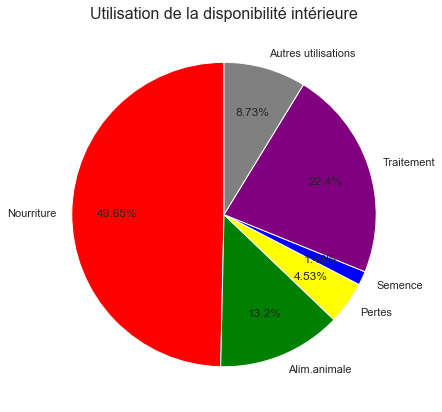

In [45]:
#graphique utilisation de la disponibilité alimentaire
pyplot.figure(figsize = (7, 7))
semence=round((dispoalim['Disponibilité intérieure']- (dispoalim['Aliments pour animaux']+dispoalim['Nourriture']+dispoalim['Traitement']+dispoalim['Autres Utilisations']+dispoalim['Pertes'])).sum()*100/dispoalim['Disponibilité intérieure'].sum(),2)
traitement=round((dispoalim['Disponibilité intérieure']- (dispoalim['Aliments pour animaux']+dispoalim['Semences']+dispoalim['Nourriture']+dispoalim['Autres Utilisations']+dispoalim['Pertes'])).sum()*100/dispoalim['Disponibilité intérieure'].sum(),2)
autres_utilisation=round((dispoalim['Disponibilité intérieure']- (dispoalim['Aliments pour animaux']+dispoalim['Semences']+dispoalim['Traitement']+dispoalim['Nourriture']+dispoalim['Pertes'])).sum()*100/dispoalim['Disponibilité intérieure'].sum(),2)
pyplot.title('Utilisation de la disponibilité intérieure').set_fontsize(16)
x=[alim_humaine, alim_animale, pertes,semence,traitement, autres_utilisation]
pyplot.pie(x, labels = ['Nourriture','Alim.animale','Pertes','Semence', 'Traitement', 'Autres utilisations'],
           colors = ['red', 'green', 'yellow','blue','purple','grey','purple'],startangle=90,
           autopct=lambda x: str(round(x, 2)) + '%',
           pctdistance =0.7 , labeldistance =1.1
           ,
           shadow = False)
pyplot.show()



### 3-5) Utilisation des céréales

In [46]:
# Proportion de l'utilisation des céréales destinés pour l'alimentation humaine
# liste des produits céréaliers
cereales=['Blé', 'Céréales, Autres', 'Maïs', 'Millet','Orge', 'RizBlé', 'Céréales, Autres', 'Maïs', 'Millet','Orge', 'Riz (Eq Blanchi)', 'Avoine', 'Sorgho', 'Seigle', 'Avoine', 'Sorgho', 'Seigle']
dispo_cereales=dispoalim[dispoalim['Produit'].isin(cereales)]
alim_humains=dispo_cereales['Nourriture'].sum()
print("La quantité de céréales destinée pour l'alimentation humaine est:",alim_humains,"de tonnes, soit","{:.2f}".format(alim_humains*100/dispoalim['Nourriture'].sum()),"%")
alim_animaux=dispo_cereales['Aliments pour animaux'].sum()
print("Celle destinée à l'alimentation animale est :",alim_animaux, "de tonnes, soit","{:.2f}".format(alim_animaux*100/dispoalim['Aliments pour animaux'].sum()),"%")
                   

La quantité de céréales destinée pour l'alimentation humaine est: 1029010000000.0 de tonnes, soit 21.10 %
Celle destinée à l'alimentation animale est : 873535000000.0 de tonnes, soit 66.98 %


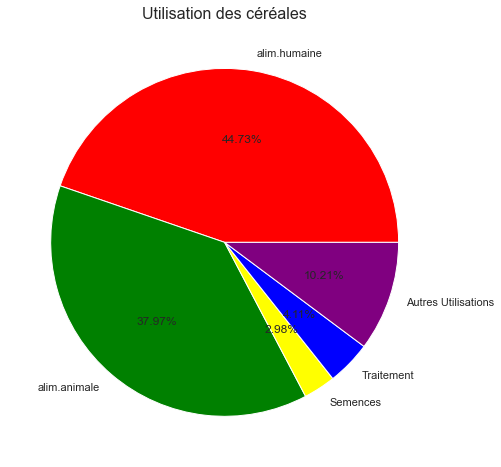

In [47]:
#graphique utilisation des céréales
pyplot.figure(figsize = (8, 8))
pyplot.title('Utilisation des céréales').set_fontsize(16)
semence= dispo_cereales['Semences'].sum()
traitement=dispo_cereales['Traitement'].sum()
autres_utilisation=dispo_cereales['Autres Utilisations'].sum()
x = [alim_humains, alim_animaux, semence,traitement, autres_utilisation]
pyplot.pie(x, labels = ['alim.humaine', 'alim.animale', 'Semences', 'Traitement','Autres Utilisations'],
           colors = ['red', 'green', 'yellow','blue','purple','grey','purple'],
           autopct = lambda x:str( round(x, 2)) + '%',
           pctdistance = 0.6, labeldistance =1.1,
           shadow = False)
pyplot.show()


La quantité de céréales destinée à l'alimentation animale est beaucoup plus importante que celle destinée pour les hommes.<br/>
Pour la répartition de manioc en Thaïlande, on va regarder spécialement son exportation et sa production en  les comparant avec la proportion de la population en sous-nutrition.

### 3-6) Répartition du manioc en Thailande

In [48]:
# proportion de l'exportation de manioc en Thaïlande
exportation_manioc= float(dispoalim.loc[(dispoalim['Produit']=='Manioc') & ( dispoalim['Pays']=='Thaïlande'),"Exportations - Quantité"])
production_manioc= float(dispoalim.loc[(dispoalim['Produit']=='Manioc') & ( dispoalim['Pays']=='Thaïlande'), "Production"])

print('La Thaïlande a exporté en 2017', exportation_manioc, 'tonnes de manioc, soit', "{:.2f}".format(exportation_manioc*100/production_manioc),"% de sa production")
#jointure population et population en sous-nutrition
proportion_ssnutri=round((sn_merge_pop1.loc[sn_merge_pop1['Pays']=='Thaïlande',"popSN"])*100/sn_merge_pop1['population'],2).sum()



La Thaïlande a exporté en 2017 25214000000.0 tonnes de manioc, soit 83.41 % de sa production


## 4) Étude détaillée de la malnutrition 

### 4-1) Proportion de la sous-nutrition des pays les plus touchés en 2017

In [49]:
#Calcul de la proportion de la sous-nutrition
sn_merge_pop1['proportionSN']=round(sn_merge_pop1['popSN']*100/sn_merge_pop1['population'],2)
# Pays les plus touchés par la malnutrition
sn_merge_pop1.sort_values(by=['proportionSN'], inplace=True, ascending=False)
# Les 10 pays où la proportion de sous-nutrition est la plus forte
sn_merge_pop1.iloc[:10]



,Pays,population,popSN,proportionSN
78,Haïti,10982366.0,5300000.0,48.26
157,République populaire démocratique de Corée,25429825.0,12000000.0,47.19
108,Madagascar,25570512.0,10500000.0,41.06
103,Libéria,4702226.0,1800000.0,38.28
100,Lesotho,2091534.0,800000.0,38.25
183,Tchad,15016753.0,5700000.0,37.96
161,Rwanda,11980961.0,4200000.0,35.06
121,Mozambique,28649018.0,9400000.0,32.81
186,Timor-Leste,1243258.0,400000.0,32.17
0,Afghanistan,36296113.0,10500000.0,28.93


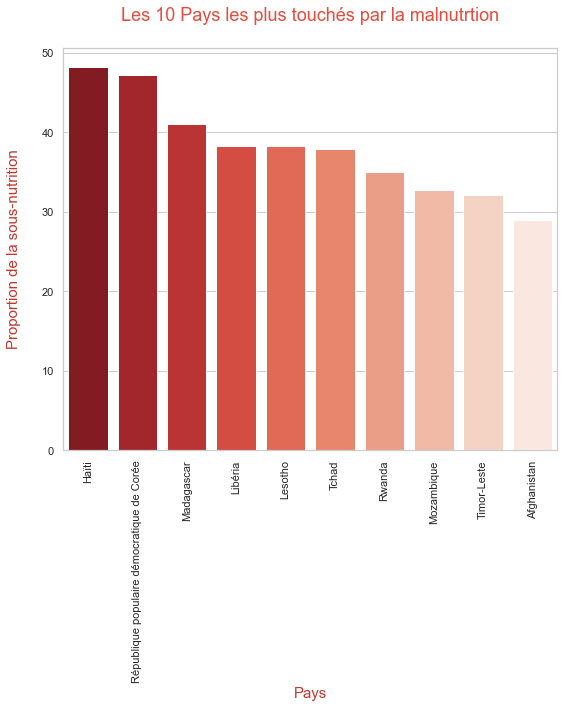

In [50]:
plt.figure(figsize=(8,10))
sns.barplot(x=sn_merge_pop1.iloc[:10]['Pays'], y=sn_merge_pop1.iloc[:10]['proportionSN'], palette="Reds_r")
plt.xlabel('Pays', fontsize=15, color='#c0392b')
plt.ylabel("Proportion de la sous-nutrition\n", fontsize=15, color='#c0392b')
plt.title("Les 10 Pays les plus touchés par la malnutrtion\n", fontsize=18, color='#e74c3c')
plt.xticks(rotation= 90)
plt.tight_layout()

Haïti est le pays le plus touché par la malnutrition au monde. <br/>
Regardons de près les aides alimentaires reçues par ces pays qui souffrent le plus de sous-nutrition.


### 4-1) Répartition des aides alimentaires

In [51]:
aide = aide_alim[["Pays", "Quantité aide(kg)"]].groupby("Pays").sum()
aide1=aide.sort_values(by="Quantité aide(kg)", ascending=False).iloc[:10]
aide1


,Quantité aide(kg)
Pays,
République arabe syrienne,1858943000
Éthiopie,1381294000
Yémen,1206484000
Soudan du Sud,695248000
Soudan,669784000
Kenya,552836000
Bangladesh,348188000
Somalie,292678000
République démocratique du Congo,288502000


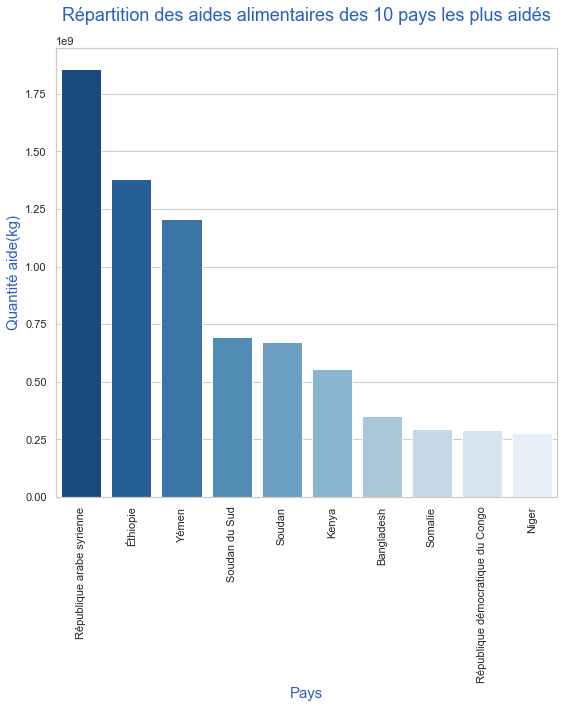

In [52]:
plt.figure(figsize=(8,10))
sns.barplot(x=aide1.index, y=aide1["Quantité aide(kg)"], palette="Blues_r")
plt.xlabel('Pays', fontsize=15, color='#2b60c2')
plt.ylabel("Quantité aide(kg)", fontsize=15, color='#2b60c2')
plt.title("Répartition des aides alimentaires des 10 pays les plus aidés\n", fontsize=18, color='#2b60c2')
plt.xticks(rotation= 90)
plt.tight_layout()

### 4-2) Disponibilté alimentaire par pays et habitant

In [55]:
dispoalim_pays = dispoalim[["Pays","Disponibilité alimentaire (Kcal/personne/jour)"]].groupby("Pays").sum()
dispoalim_pays1=dispoalim_pays.sort_values(by="Disponibilité alimentaire (Kcal/personne/jour)", ascending=False).head(10)
dispoalim_pays1

,Disponibilité alimentaire (Kcal/personne/jour)
Pays,
Autriche,3770.0
Belgique,3737.0
Turquie,3708.0
États-Unis d'Amérique,3682.0
Israël,3610.0
Irlande,3602.0
Italie,3578.0
Luxembourg,3540.0
Égypte,3518.0


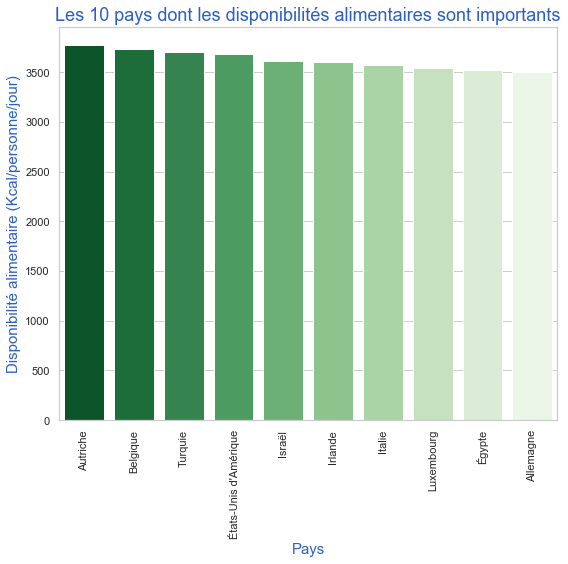

In [56]:
plt.figure(figsize=(8,8))
sns.barplot(x=dispoalim_pays1.index, y=dispoalim_pays1["Disponibilité alimentaire (Kcal/personne/jour)"], palette="Greens_r")
plt.xlabel('Pays', fontsize=15, color='#2b60c2')
plt.ylabel("Disponibilité alimentaire (Kcal/personne/jour)", fontsize=15, color='#2b60c2')
plt.title("Les 10 pays dont les disponibilités alimentaires sont importants", fontsize=18, color='#2b60c2')
plt.xticks(rotation= 90)
plt.tight_layout()

In [ ]:
df_transaction['time'] = pd.to_datetime(df_transaction['date']).dt.time
df_transaction['date'] = pd.to_datetime(df_transaction['date']).dt.date
